In [28]:
import warnings
import pandas as pd 
import numpy as np
from scipy.spatial import distance
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB

In [29]:
warnings.simplefilter('ignore')

In [30]:
#Read the file
def read_file(filename): 
    data = pd.read_csv("data/" + filename + ".csv") 
    data.head()
    return data

In [31]:
def data_preprocessing(data):
    data = data.rename(columns={"Churn": "churn"})
    drop_unique_col = ["state", "phone number", "area code", "customerID"]
    for col in drop_unique_col:
        if col in data.columns:
            data = data.drop([col], axis = 1)
    for col in data.columns:
        data[col].replace("yes", True, inplace=True)
        data[col].replace("no", False, inplace=True)
        data[col].replace("Yes", True, inplace=True)
        data[col].replace("No", False, inplace=True)
        if(data[col].dtype == object):     
            data = pd.concat([data,pd.get_dummies(data[col], prefix=col)],axis=1)
            data = data.drop([col], axis = 1)
        elif(data[col].dtype == bool):
            data[col].replace(True, 1, inplace=True)
            data[col].replace(False, 0, inplace=True)
        else:
            data[col] = pd.cut(data[col],10,right=True,labels=[0,1,2,3,4,5,6,7,8,9])   
    #data.head()
    #data.groupby('churn').count() 
    return data

In [32]:
# Compute the Distance Matrix
def distance_matrix(data, dist_type):
    matrix = distance.cdist(data.iloc[:,:-1],data.iloc[:,:-1], dist_type)
    distanceMatrix = pd.DataFrame(matrix)
    return distanceMatrix

In [33]:
def plot_distance_matrix(distanceMatrix):
    width_in_inches = 2
    height_in_inches = 2
    dots_per_inch = 70
    plt.figure(figsize=(width_in_inches, height_in_inches),dpi=dots_per_inch)
    distanceMatrix = np.array(distanceMatrix)
    length = distanceMatrix.shape[0]
    width = distanceMatrix.shape[1]
    x, y = np.meshgrid(np.arange(length), np.arange(width))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot_surface(x, y, distanceMatrix)
    plt.show()

In [34]:
# Gaussian Naive Bayes Classifier
def classification(data, classifier_type):
    clf = GaussianNB()
    results = []
    features = list(data.columns)
    features.remove('churn')
    features.remove('distance')

    for zoneLength in range(100,1001,100):
    
        LDT = data[0:zoneLength]
        UDT = data[-zoneLength:]
        trainingData = data[zoneLength:-(zoneLength)]
    
        X = trainingData.loc[:,features]
        Y = trainingData.loc[:,['churn']]
        clf.fit(X,Y)
    
        LDT_x = LDT.loc[:,features]
        LDT_y = LDT.loc[:,['churn']]
        prediction = clf.predict(LDT_x)

        LDT_accuracy = accuracy_score(LDT_y, prediction) * 100
        LDT_precision = precision_score(LDT_y, prediction) * 100
        LDT_recall = recall_score(LDT_y, prediction) * 100
        LDT_fmeasure = f1_score(LDT_y, prediction) * 100
    
        UDT_x = UDT.loc[:, features]
        UDT_y = UDT.loc[:,['churn']]
        prediction = clf.predict(UDT_x)

        UDT_accuracy = accuracy_score(UDT_y, prediction) *100
        UDT_precision = precision_score(UDT_y, prediction) * 100
        UDT_recall = recall_score(UDT_y, prediction) * 100
        UDT_fmeasure = f1_score(UDT_y, prediction)  * 100
    
        results.append({'zoneLength':zoneLength, 'LDT_accuracy':LDT_accuracy, 'LDT_precision':LDT_precision, 'LDT_recall':LDT_recall, 'LDT_fmeasure': LDT_fmeasure,'UDT_accuracy':UDT_accuracy, 'UDT_precision':UDT_precision, 'UDT_recall':UDT_recall, 'UDT_fmeasure': UDT_fmeasure})
        
    resultsDf = pd.DataFrame(results)
    resultsDf = resultsDf[['zoneLength', 'LDT_accuracy','UDT_accuracy','LDT_precision','UDT_precision','LDT_recall','UDT_recall','LDT_fmeasure','UDT_fmeasure']]
        
    return resultsDf
    

In [35]:
def plot_results(resultsDf):
    
    plt.style.use('seaborn-whitegrid')
        
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(100, 1000, 10)
    ax.plot(x, resultsDf['UDT_accuracy'],color='red',marker='o',label='UDT-Accuracy')
    ax.plot(x, resultsDf['LDT_accuracy'],color='blue',marker='s',label='LDT-Accuracy')
    plt.legend(loc='best')

    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(100, 1000, 10)
    ax.plot(x, resultsDf['UDT_precision'],color='yellow',marker='o',label='UDT-Precision')
    ax.plot(x, resultsDf['LDT_precision'],color='black',marker='s',label='LDT-Precision')
    plt.legend(loc='best')
    
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(100, 1000, 10)
    ax.plot(x, resultsDf['UDT_recall'],color='yellow',marker='o',label='UDT-Recall')
    ax.plot(x, resultsDf['LDT_recall'],color='black',marker='s',label='LDT-Recall')
    plt.legend(loc='best')

    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(100, 1000, 10)
    ax.plot(x, resultsDf['UDT_fmeasure'],color='yellow',marker='o',label='UDT-fmeasure')
    ax.plot(x, resultsDf['LDT_fmeasure'],color='black',marker='s',label='LDT-fmeasure')
    plt.legend(loc='best')



yes
      0     1     2     3     4     5     6     7     8     9     ...  7033  \
0      0.0  25.0  15.0  25.0  15.0  25.0  24.0  11.0  28.0  26.0  ...  23.0   
1     25.0   0.0  14.0  12.0  22.0  28.0  25.0  16.0  29.0  13.0  ...  16.0   
2     15.0  14.0   0.0  24.0  14.0  26.0  21.0  14.0  31.0  17.0  ...  18.0   
3     25.0  12.0  24.0   0.0  30.0  34.0  31.0  18.0  31.0  15.0  ...  22.0   
4     15.0  22.0  14.0  30.0   0.0  14.0  19.0  18.0  19.0  27.0  ...  12.0   
5     25.0  28.0  26.0  34.0  14.0   0.0  17.0  26.0   7.0  37.0  ...  22.0   
6     24.0  25.0  21.0  31.0  19.0  17.0   0.0  27.0  18.0  24.0  ...  13.0   
7     11.0  16.0  14.0  18.0  18.0  26.0  27.0   0.0  31.0  23.0  ...  22.0   
8     28.0  29.0  31.0  31.0  19.0   7.0  18.0  31.0   0.0  38.0  ...  23.0   
9     26.0  13.0  17.0  15.0  27.0  37.0  24.0  23.0  38.0   0.0  ...  19.0   
10    17.0  12.0   8.0  22.0  16.0  26.0  21.0  12.0  29.0  17.0  ...  16.0   
11    30.0  25.0  27.0  29.0  31.0  35.0  30.0  

<Figure size 140x140 with 0 Axes>

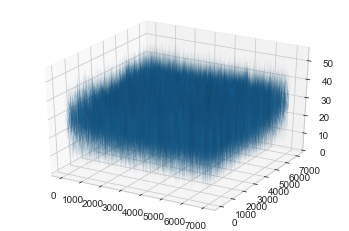

   zoneLength  LDT_accuracy  UDT_accuracy  LDT_precision  UDT_precision  \
0         100     24.000000     32.000000      22.916667      30.208333   
1         200     26.000000     30.000000      24.615385      29.015544   
2         300     27.000000     30.333333      25.684932      29.310345   
3         400     26.500000     28.000000      25.257732      26.424870   
4         500     27.000000     29.000000      25.567010      27.385892   
5         600     25.666667     29.000000      24.398625      27.729636   
6         700     26.571429     28.714286      24.925816      27.164179   
7         800     26.750000     27.875000      24.641460      26.405229   
8         900     27.333333     28.222222      25.319396      26.967593   
9        1000     27.800000     27.900000      25.627615      26.583593   

   LDT_recall  UDT_recall  LDT_fmeasure  UDT_fmeasure  
0   91.666667   96.666667     36.666667     46.031746  
1   97.959184   94.915254     39.344262     44.444444  
2   97

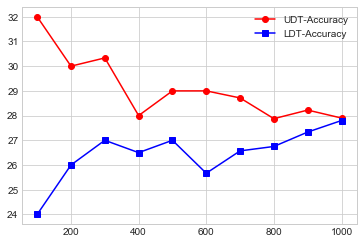

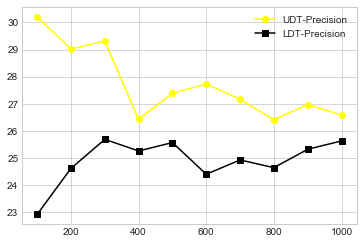

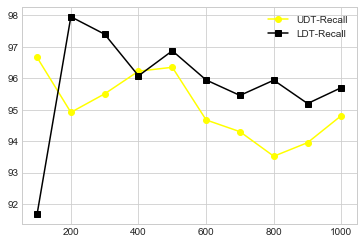

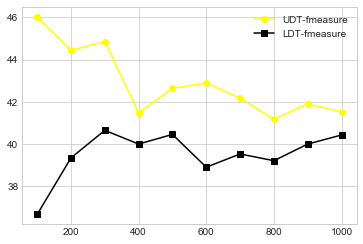

In [36]:
print("yes")
data = read_file("dataset-2")
#print(data)
data = data_preprocessing(data)
#print(data)
distanceMatrix = distance_matrix(data,'cityblock')
print(distanceMatrix)
plot_distance_matrix(distanceMatrix)

#Append Distance
data.loc[:,'distance'] = distanceMatrix.sum(axis=1)
# Sort the dataset in ascending order of distance
data.sort_values(by=['distance'])

resultsDf = classification(data, 'Gaussian')
print(resultsDf)
plot_results(resultsDf)
